# Descripcion

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.
Para completar esta tarea, tendrás que realizar los siguientes pasos:
-	Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
-	Crear un modelo para predecir el volumen de reservas en pozos nuevos.
-	Elegir los pozos petrolíferos que tienen los valores estimados más altos.
-	Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

# Inicializacion

In [1]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca cargamos las librerias necesarias para el proyecto.
</div>

# Cargar los Datos

In [2]:
# Carga el archivo de datos en un DataFrame

try:
    data_0 = pd.read_csv('geo_data_0.csv')
    data_1 = pd.read_csv('geo_data_1.csv')
    data_2 = pd.read_csv('geo_data_2.csv')    
except:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Ahora cargamos los datos por cada dataframe que nos compartieron.
</div>

# Exploracion de los Datos

In [3]:
# imprime la información general/resumida sobre el DataFrame

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(100000, 5)
(100000, 5)
(100000, 5)


In [4]:
# Imprimimos una muestra de los datos del DataFrame

print(data_0.head(10))
print(data_1.head(10))
print(data_2.head(10))

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
5  wX4Hy  0.969570  0.489775 -0.735383   64.741541
6  tL6pL  0.645075  0.530656  1.780266   49.055285
7  BYPU6 -0.400648  0.808337 -5.624670   72.943292
8  j9Oui  0.643105 -0.551583  2.372141  113.356160
9  OLuZU  2.173381  0.563698  9.441852  127.910945
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
5  HHckp  -3.327590  -2.205276  3.003647   84.038886
6  h5Ujo -11.142655 -10.133399  4.002382  110.992147
7  muH9x   4.23

In [5]:
# Obtener información sobre los datos

print(data_0.info())
print(data_1.info())
print(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En las 3 celdas anteriores visualizamos la forma, contenido inicial y tipo de data contenida en las `DF` por Region.
</div>

In [6]:
# Obtener información sobre los datos

print(data_0.describe())
print(data_1.describe())
print(data_2.describe())

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%       

In [7]:
# Elimina la columna 'id'
data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)


# Convertir variables numéricas a enteros
#data_0[['f0', 'f1', 'f2', 'product']] = data_0[['f0', 'f1', 'f2', 'product']].astype(int)
#data_1[['f0', 'f1', 'f2', 'product']] = data_1[['f0', 'f1', 'f2', 'product']].astype(int)
#data_2[['f0', 'f1', 'f2', 'product']] = data_2[['f0', 'f1', 'f2', 'product']].astype(int)

# Verificar si hay valores nulos en cada columna

null_values = data_0.isnull().sum(), data_1.isnull().sum(), data_2.isnull().sum()

print("Valores nulos por columna:")
null_values

Valores nulos por columna:


(f0         0
 f1         0
 f2         0
 product    0
 dtype: int64,
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64,
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Nos aseguramos de que no haya nulos presentes en los `DF` ademas de quitar la columna `ID` ya que no es relevante para la investigacion.
</div>

In [8]:
# Asegúrate de tener solo las columnas relevantes para la detección de anomalías
features = ['f0', 'f1', 'f2', 'product']
data = data_0[features]

# Calcular la puntuación Z para cada característica
z_scores = np.abs(zscore(data))

# Define un umbral para identificar valores atípicos (puedes ajustar este umbral)
threshold = 3

# Encuentra las posiciones de los valores atípicos
outliers = np.where(z_scores > threshold)

# Imprime las posiciones de los valores atípicos
print("Posiciones de valores atípicos:")
for feature, positions in zip(features, outliers):
    print(f"Característica: {feature}, Posiciones: {positions}")

Posiciones de valores atípicos:
Característica: f0, Posiciones: [  131   232   947  1054  2227  3426  4384  4475  4515  6002  6404  6496
  6760  7122  8953 11404 11773 11882 13949 14128 14813 15348 15353 15492
 16373 16748 17717 17908 18296 19439 20275 21210 21253 21745 22500 22669
 23465 23472 24012 24284 24395 24458 24685 25156 25827 26773 26835 27238
 27658 29047 29529 29668 30946 32357 32407 32540 32867 34331 34703 34958
 35127 35273 35659 36033 36172 36573 37820 37854 38886 39384 39904 40928
 41364 41435 41519 42379 42500 42538 43388 43808 44651 44754 46299 46784
 47362 49785 50265 50377 50502 51140 51464 51494 51905 52356 52455 52477
 52820 54228 54328 55233 55480 55529 56960 57338 57591 57748 58060 58269
 59136 59536 59770 59780 60351 61554 61800 62404 65487 65507 65743 66543
 68207 68527 70439 70797 71028 71080 71202 72059 72133 73887 74439 74589
 74946 75469 75714 76089 76748 76826 78808 78948 79037 80159 80239 80361
 80729 81257 81450 82305 83095 84701 85054 85572 86449 86554

In [9]:
# Asegúrate de tener solo las columnas relevantes para la detección de anomalías
features = ['f0', 'f1', 'f2', 'product']
data = data_1[features]

# Calcular la puntuación Z para cada característica
z_scores = np.abs(zscore(data))

# Define un umbral para identificar valores atípicos (puedes ajustar este umbral)
threshold = 3

# Encuentra las posiciones de los valores atípicos
outliers = np.where(z_scores > threshold)

# Imprime las posiciones de los valores atípicos
print("Posiciones de valores atípicos:")
for feature, positions in zip(features, outliers):
    print(f"Característica: {feature}, Posiciones: {positions}")

Posiciones de valores atípicos:
Característica: f0, Posiciones: [  769  1201  1576  2254  2367  2379  2688  3262  3333  3692  4062  4097
  4785  5042  5085  5630  5631  5815  6370  7220  7227  7479  7919  8600
  8637  8645  8667  9100  9272  9765 10232 10521 10662 10671 12242 13256
 13376 13939 14647 15143 15166 15875 15949 16032 16042 16900 17083 17924
 18818 19524 19672 19742 19866 19982 20143 20341 21307 21445 21779 22071
 23165 23834 24452 25851 26237 26292 26531 26843 27255 27593 28336 28698
 28978 29148 29470 29682 30461 30533 31688 32386 32549 32634 33033 33351
 33562 34189 34283 34720 35253 35283 35481 35621 35716 35734 35744 36493
 36631 37079 37538 37708 37861 38245 38607 38750 38836 39193 39561 40652
 40678 41475 41691 41916 42299 42357 43106 43235 43770 44439 44991 45057
 45769 46583 47208 47992 48467 48593 48643 48944 49027 49047 49242 49484
 50059 50841 51260 51261 51356 52190 52618 52680 53084 54467 54788 54812
 56046 56948 57368 57986 58032 58184 58373 58726 58833 59374

In [10]:
# Asegúrate de tener solo las columnas relevantes para la detección de anomalías
features = ['f0', 'f1', 'f2', 'product']
data = data_2[features]

# Calcular la puntuación Z para cada característica
z_scores = np.abs(zscore(data))

# Define un umbral para identificar valores atípicos (puedes ajustar este umbral)
threshold = 3

# Encuentra las posiciones de los valores atípicos
outliers = np.where(z_scores > threshold)

# Imprime las posiciones de los valores atípicos
print("Posiciones de valores atípicos:")
for feature, positions in zip(features, outliers):
    print(f"Característica: {feature}, Posiciones: {positions}")

Posiciones de valores atípicos:
Característica: f0, Posiciones: [  110   130   304   314   319   334   426   443   586   620   644   709
   771  1056  1311  1349  1545  1546  1610  1904  2032  2145  2361  2646
  2709  2897  2990  3445  3540  3720  3924  4025  4055  4591  4674  4744
  4752  4761  5016  5172  5293  5296  5357  5375  5434  5443  5567  5944
  6109  6207  6219  6558  6647  6689  6713  6951  7110  7176  7661  7891
  8021  8028  8165  8292  8317  8417  8770  8839  8869  8901  8920  9268
  9756  9818 10138 10452 10758 11058 11062 11210 11316 11323 11377 11634
 11727 11963 12056 12160 12239 12278 12327 12334 12544 12575 12730 12907
 13067 13469 13638 14121 14846 15110 15488 15594 15772 16022 16061 16437
 16553 16613 16710 16723 16773 17020 17106 17415 17638 17665 17808 18215
 18391 18485 18534 18747 18867 18951 18963 19033 19096 19314 19407 19467
 19674 19698 19757 20819 21349 21383 21540 21547 21803 22012 22102 22134
 22349 22481 22533 22578 22597 22647 22670 22699 22764 22860

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como hemos encontrado una cantidad significativa de datos atipicos y anomalias en los datos vamos a reemplazarlos por la mediana de estos para intentar ver si mejora la precision de los resultados.
</div>

In [11]:
# Obtener información sobre los datos

print(data_0.describe())
print(data_1.describe())
print(data_2.describe())

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%       

In [12]:
# Función para reemplazar valores atípicos
def truncate_outliers(data, column):
    # Calcular el rango intercuartílico (IQR)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular los límites para identificar valores atípicos
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Truncar valores atípicos
    data[column] = np.where(data[column] > upper_limit, upper_limit, data[column])
    data[column] = np.where(data[column] < lower_limit, lower_limit, data[column])

# Aplicar el truncamiento a las columnas relevantes
truncate_outliers(data_0, 'f0')
#truncate_outliers(data_0, 'f1')

#truncate_outliers(data_1, 'f0')
#truncate_outliers(data_1, 'f1')

truncate_outliers(data_2, 'f0')
truncate_outliers(data_2, 'f1')

# Mostrar la data después del tratamiento
print("Data después del tratamiento para data_0:")
print(data_0.head())

print("\nEstadísticas después del tratamiento para data_0:")
print(data_0.describe())

print("Data después del tratamiento para data_0:")
print(data_1.head())

print("\nEstadísticas después del tratamiento para data_0:")
print(data_1.describe())

print("Data después del tratamiento para data_0:")
print(data_2.head())

print("\nEstadísticas después del tratamiento para data_0:")
print(data_2.describe())

Data después del tratamiento para data_0:
         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647

Estadísticas después del tratamiento para data_0:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
Data después del tratamiento para data_0:
       

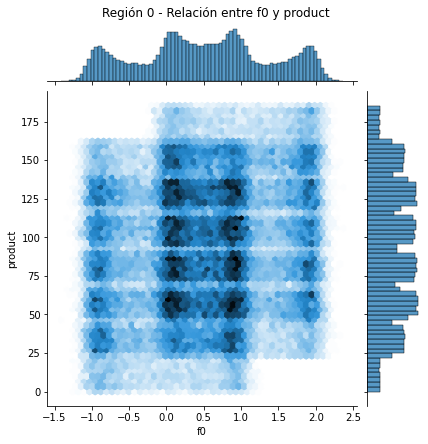

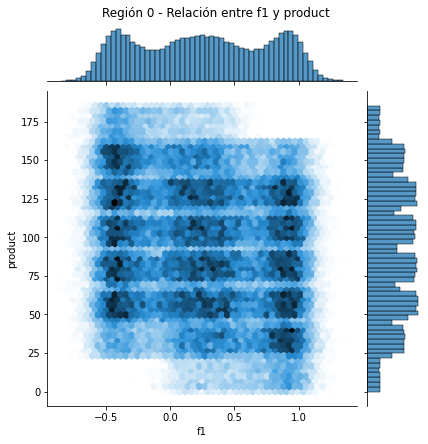

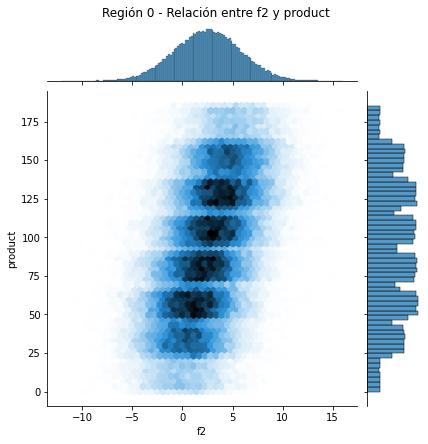

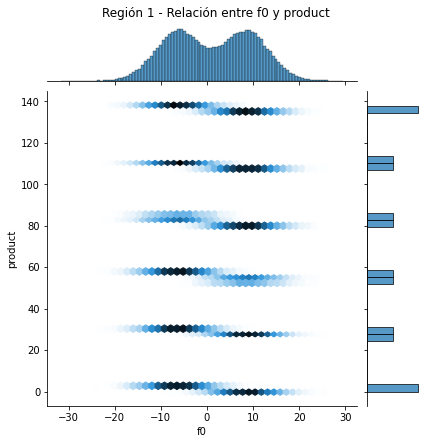

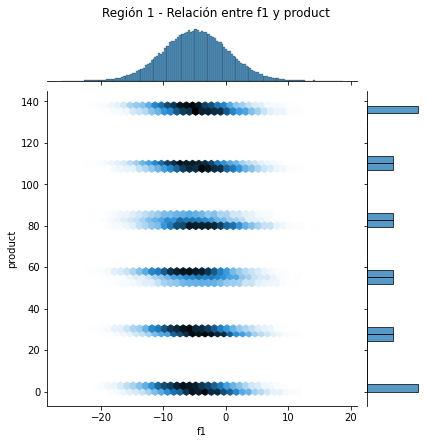

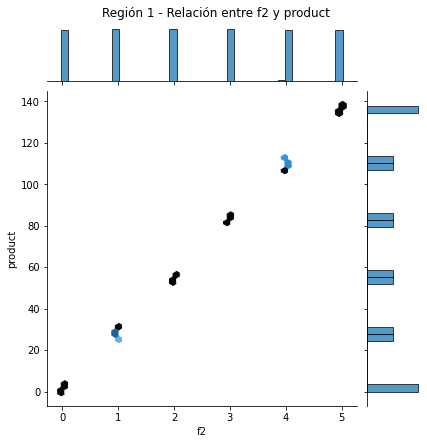

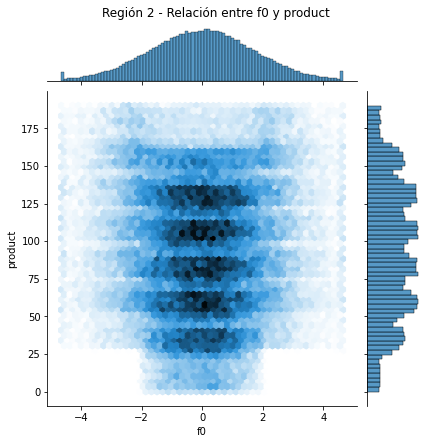

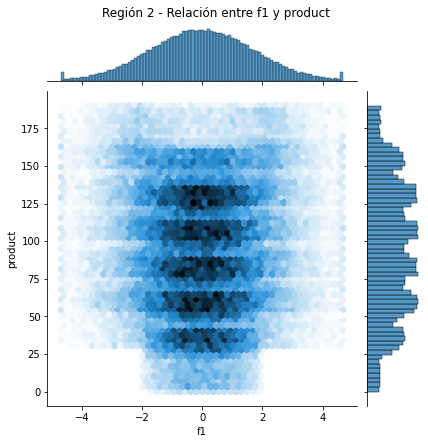

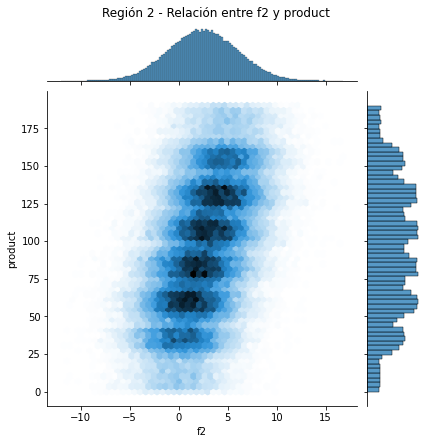

Correlación de Pearson para la Región 0:
f0         0.143536
f1        -0.192356
f2         0.483663
product    1.000000
Name: product, dtype: float64

Correlación de Pearson para la Región 1:
f0        -0.030491
f1        -0.010155
f2         0.999397
product    1.000000
Name: product, dtype: float64

Correlación de Pearson para la Región 2:
f0        -0.002006
f1        -0.000932
f2         0.445871
product    1.000000
Name: product, dtype: float64


In [13]:
# Función para visualizar la relación entre dos variables y sus distribuciones individuales
def visualize_relationship(feature, target, data, region):
    sns.jointplot(x=feature, y=target, data=data, kind='hex')
    plt.suptitle(f'Región {region} - Relación entre {feature} y {target}', y=1.02)
    plt.show()

# Visualizar la relación para la Región 0
for feature in ['f0', 'f1', 'f2']:
    visualize_relationship(feature, 'product', data_0, 0)

# Visualizar la relación para la Región 1
for feature in ['f0', 'f1', 'f2']:
    visualize_relationship(feature, 'product', data_1, 1)

# Visualizar la relación para la Región 2
for feature in ['f0', 'f1', 'f2']:
    visualize_relationship(feature, 'product', data_2, 2)

# Calcular la correlación de Pearson para cada característica con respecto al target
correlation_0 = data_0[['f0', 'f1', 'f2', 'product']].corr()['product']
correlation_1 = data_1[['f0', 'f1', 'f2', 'product']].corr()['product']
correlation_2 = data_2[['f0', 'f1', 'f2', 'product']].corr()['product']

print("Correlación de Pearson para la Región 0:")
print(correlation_0)

print("\nCorrelación de Pearson para la Región 1:")
print(correlation_1)

print("\nCorrelación de Pearson para la Región 2:")
print(correlation_2)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Segun los graficos de dispersion generados, parece que no hay una correlación clara o un patron entre las caracteristicas (f0, f1, f2) y el producto en las Regiones 0 y 2, ya que los puntos de datos estan dispersos uniformemente. En la Region 1, hay patrones horizontales distintos que indican algún nivel de correlacion, pero no es lo suficientemente fuerte como para resultar en una ganancia positiva, dado este caso proseguiremos con el entrenamiento del modelo y las predicciones.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante CORREGIDO</b> <a class="tocSkip"></a>
al observar los graficos y la correlacion de Pearson que confirma lo visto en los graficos, podemos observar que al igual que en los graficos en la correlacion por region se pueden apreciar los siguientes detalles a tomar en cuenta, La Región 0 tiene una correlación débil o moderada entre las características y el producto, la Región 1 tiene una correlación muy débil o casi perfecta entre las características y el producto, y la Región 2 tiene una correlación muy débil o moderada entre las características y el producto. Esto sugiere que las características usadas para hacer las predicciones no son las mas adecuadas para estimar el volumen de reservas de cada pozo. Tal vez podrias explorar otras variables o combinarlas de manera diferente para obtener mejores resultados.
</div>

# Trabajo en el modelo

In [14]:
# Dividir datos para la Región 0
train_data_0, val_data_0 = train_test_split(data_0, test_size=0.25, random_state=42)

# Seleccionar características y objetivo para entrenamiento
X_train_0 = train_data_0[['f0', 'f1', 'f2']]
y_train_0 = train_data_0['product']

# Seleccionar características y objetivo para validación
X_val_0 = val_data_0[['f0', 'f1', 'f2']]
y_val_0 = val_data_0['product']

In [15]:
# Inicializar modelo
model_0 = LinearRegression()

# Entrenar modelo para la Región 0
model_0.fit(X_train_0, y_train_0)

# Hacer predicciones para el conjunto de validación de la Región 0
predictions_0 = model_0.predict(X_val_0)

# Crear DataFrame con predicciones y respuestas correctas para la Región 0
results_0 = pd.DataFrame({'Predictions': predictions_0, 'Actual': y_val_0})

In [16]:
# Calcular el volumen medio de reservas predicho y RMSE del modelo para la Región 0
mean_predicted_volume_0 = results_0['Predictions'].mean()
rmse_0 = np.sqrt(mean_squared_error(y_val_0, predictions_0))

# Mostrar resultados para la Región 0
print(f"Volumen medio de reservas predicho para la Región 0: {mean_predicted_volume_0}")
print(f"RMSE del modelo para la Región 0: {rmse_0}")

Volumen medio de reservas predicho para la Región 0: 92.3987999065777
RMSE del modelo para la Región 0: 37.756600350261685


In [17]:
# Dividir datos para la Región 1
train_data_1, val_data_1 = train_test_split(data_1, test_size=0.25, random_state=42)

# Seleccionar características y objetivo para entrenamiento
X_train_1 = train_data_1[['f0', 'f1', 'f2']]
y_train_1 = train_data_1['product']

# Seleccionar características y objetivo para validación
X_val_1 = val_data_1[['f0', 'f1', 'f2']]
y_val_1 = val_data_1['product']

In [18]:
# Inicializar modelo
model_1 = LinearRegression()

# Entrenar modelo para la Región 1
model_1.fit(X_train_1, y_train_1)

# Hacer predicciones para el conjunto de validación de la Región 1
predictions_1 = model_1.predict(X_val_1)

# Crear DataFrame con predicciones y respuestas correctas para la Región 1
results_1 = pd.DataFrame({'Predictions': predictions_1, 'Actual': y_val_1})

In [19]:
# Calcular el volumen medio de reservas predicho y RMSE del modelo para la Región 1
mean_predicted_volume_1 = results_1['Predictions'].mean()
rmse_1 = np.sqrt(mean_squared_error(y_val_1, predictions_1))

# Mostrar resultados para la Región 1
print(f"Volumen medio de reservas predicho para la Región 0: {mean_predicted_volume_1}")
print(f"RMSE del modelo para la Región 1: {rmse_1}")

Volumen medio de reservas predicho para la Región 0: 68.71287803913762
RMSE del modelo para la Región 1: 0.890280100102884


In [20]:
# Dividir datos para la Región 2
train_data_2, val_data_2 = train_test_split(data_2, test_size=0.25, random_state=42)

# Seleccionar características y objetivo para entrenamiento
X_train_2 = train_data_2[['f0', 'f1', 'f2']]
y_train_2 = train_data_2['product']

# Seleccionar características y objetivo para validación
X_val_2 = val_data_2[['f0', 'f1', 'f2']]
y_val_2 = val_data_2['product']

In [21]:
# Inicializar modelo
model_2 = LinearRegression()

# Entrenar modelo para la Región 2
model_2.fit(X_train_2, y_train_2)

# Hacer predicciones para el conjunto de validación de la Región 2
predictions_2 = model_2.predict(X_val_2)

# Crear DataFrame con predicciones y respuestas correctas para la Región 2
results_2 = pd.DataFrame({'Predictions': predictions_2, 'Actual': y_val_2})

In [22]:
# Calcular el volumen medio de reservas predicho y RMSE del modelo para la Región 2
mean_predicted_volume_2 = results_2['Predictions'].mean()
rmse_2 = np.sqrt(mean_squared_error(y_val_2, predictions_2))

# Mostrar resultados para la Región 2
print(f"Volumen medio de reservas predicho para la Región 2: {mean_predicted_volume_2}")
print(f"RMSE del modelo para la Región 2: {rmse_2}")

Volumen medio de reservas predicho para la Región 2: 94.77109017728539
RMSE del modelo para la Región 2: 40.14582117683454


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos ver, despues de ejecutar el modelo en cada region observamos que solamente en la `Region 1` funciona correctamente el modelo, podriamos probar con otros tipos de modelos para las demas regiones, pero como estamos atados a usar `LinearRegression` dado en las condiciones del proyecto, en cierto modo estamos atados de manos, de todos modos seguiremos adelante para observar las conclusiones que nos trae esta forma de abordar los datos.
</div>

In [23]:
# Almacenar valores necesarios
investment_per_well = 100_000_000 / 200  # Inversión por pozo
min_revenue_per_well = 500_000  # Mínimo ingreso por pozo para evitar pérdidas

# Comparar con la cantidad media de reservas en cada región
average_reserves_0 = data_0['product'].mean()
average_reserves_1 = data_1['product'].mean()
average_reserves_2 = data_2['product'].mean()

# Presentar conclusiones
print(f"Inversión por pozo: {investment_per_well}")
print(f"Reservas medias por región:\n"
      f"Región 0: {average_reserves_0}\n"
      f"Región 1: {average_reserves_1}\n"
      f"Región 2: {average_reserves_2}")

Inversión por pozo: 500000.0
Reservas medias por región:
Región 0: 92.50000000000001
Región 1: 68.82500000000002
Región 2: 95.00000000000004


In [24]:
# Dividir datos para la Región 0
train_data_0, val_data_0 = train_test_split(data_0, test_size=0.25, random_state=42)

# Dividir datos para la Región 1
train_data_1, val_data_1 = train_test_split(data_1, test_size=0.25, random_state=42)

# Dividir datos para la Región 2
train_data_2, val_data_2 = train_test_split(data_2, test_size=0.25, random_state=42)

# Seleccionar características y objetivo para entrenamiento
X_train_0 = train_data_0[['f0', 'f1', 'f2']]
y_train_0 = train_data_0['product']

# Seleccionar características y objetivo para validación
X_val_0 = val_data_0[['f0', 'f1', 'f2']]
y_val_0 = val_data_0['product']

# Seleccionar características y objetivo para entrenamiento
X_train_1 = train_data_1[['f0', 'f1', 'f2']]
y_train_1 = train_data_1['product']

# Seleccionar características y objetivo para validación
X_val_1 = val_data_1[['f0', 'f1', 'f2']]
y_val_1 = val_data_1['product']

# Seleccionar características y objetivo para entrenamiento
X_train_2 = train_data_2[['f0', 'f1', 'f2']]
y_train_2 = train_data_2['product']

# Seleccionar características y objetivo para validación
X_val_2 = val_data_2[['f0', 'f1', 'f2']]
y_val_2 = val_data_2['product']

# Función para entrenar y predecir
def train_and_predict(X_train, y_train, X_val):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return predictions

# Aplicar la función a la Región 0
predictions_0 = train_and_predict(X_train_0, y_train_0, X_val_0)

# Crear DataFrame con predicciones y respuestas correctas para la Región 0
results_0 = pd.DataFrame({'Predictions': predictions_0, 'Actual': y_val_0})

# Aplicar la función a la Región 1
predictions_1 = train_and_predict(X_train_1, y_train_1, X_val_1)

# Crear DataFrame con predicciones y respuestas correctas para la Región 1
results_1 = pd.DataFrame({'Predictions': predictions_1, 'Actual': y_val_1})

# Aplicar la función a la Región 2
predictions_2 = train_and_predict(X_train_2, y_train_2, X_val_2)

# Crear DataFrame con predicciones y respuestas correctas para la Región 2
results_2 = pd.DataFrame({'Predictions': predictions_2, 'Actual': y_val_2})

In [54]:
BUDGET = 1000000
well_count = 200
cost_per_well = BUDGET / well_count
revenue_per_unit = 4500
points_per_budget = 500

# Función para calcular beneficios y almacenar predicciones
def calculate_revenue_and_predictions(target, predictions, well_count):
    # Asegurémonos de que los datos estén ordenados y tengan un índice numérico
    target_sorted = pd.Series(target).sort_values(ascending=False).reset_index(drop=True)
    predictions_sorted = pd.Series(predictions).sort_values(ascending=False).reset_index(drop=True)

    # Seleccionamos los n pozos del objetivo en base a los índices de las predicciones más altas
    selected_indices = predictions_sorted.index[:well_count]
    selected = target_sorted.iloc[selected_indices]

    # Almacenar las predicciones para los 200 pozos
    selected_predictions = predictions_sorted.iloc[selected_indices]

    # Calculamos el volumen total, sumando el volumen de reservas de n pozos seleccionados
    volume_total = selected.sum()
    
    # Calculamos el ingreso multiplicando el volumen total por las ganancias por unidad de producto
    income = volume_total * revenue_per_unit
          
    # Calculamos el costo total por el desarrollo de n pozos
    cost = well_count * cost_per_well
    
    # Calculamos el beneficio bruto restando el costo de los ingresos
    profit = income - cost

    # Devolvemos el beneficio y las predicciones seleccionadas
    return profit, selected_predictions

# Aplicar la función a cada región
profit_0, predictions_0_selected = calculate_revenue_and_predictions(data_0['product'], predictions_0, 200)
profit_1, predictions_1_selected = calculate_revenue_and_predictions(data_1['product'], predictions_1, 200)
profit_2, predictions_2_selected = calculate_revenue_and_predictions(data_2['product'], predictions_2, 200)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante al comentario del revisor</b> <a class="tocSkip"></a>
Despues de haber implementado de manera satisfactoria las correcciones hechas por el revisor, incluyendo las variables no declaradas, para que el codigo funcionara correctamente, con los valores de las condiciones del proyecto, podemos ver que el resultado ha sido exactamente el mismo.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante: CORREGIDO</b> <a class="tocSkip"></a>
Luegode haber corregido un detalle que no permitia hacer el calculo correctamente, podemos ver verdaderamente los resultados de cada region, como podemos observar la `Region_0` y la `Region_2`son las que tienen mayores ganancias potenciales, como podemos apreciar que la `Region_2` tiene mayores ganancias sera la que elegiremos para el desarrollo de los pozos petroliferos que desea la empresa, aparte tambien esta region tiene mayores reservas de petroleo, lo cual le permitira maximizar las ganancias a `OilyGiant`.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Para lograr esto, construiremos la función  que tomará las predicciones (predictions_1, predictions_2, predictions_3) realizadas por el modelo de cada región y las ordenará en forma descendente, escogiendo aquellas predicciones con los valores más altos. Filtraremos el volumen objetivo de reservas en base a las predicciones más altas, utilizando para esto los índices de las predicciones. También estableceremos el número de pozos con los cuales se realizará el cálculo final. La función contará con los siguientes argumentos:

- `target`: objeto del conjunto de validación para cada región.
- `predictions`: predicciones realizadas por el modelo de cada región.
- `count`: número de pozos con los cuales se calculará el beneficio. 

Para calcular el beneficio bruto, primero estableceremos el valor de ingresos para n pozos, para esto multiplicaremos el volumen total por las ganancias por unidad de producto `revenue_per_unit`. Luego, determinaremos el costo del desarrollo de n pozos, para lo cual multiplicaremos n pozos por el costo para el desarrollo de un pozo `cost_one`. Finalmente, restaremos el valor de ingresos de los costos de bienes.

</div>

<code>
def revenue(target, predictions, count):
    
    # Tomamos las predicciones y las ordenamos de forma descendente
    predictions_sorted = pd.Series(predictions).sort_values(ascending=False)
    # Seleccionamos los n pozos del objetivo en base a los índices de las predicciones más altas
    selected = target.reset_index(drop=True).iloc[predictions_sorted.index][:count]
    
    # Calculamos el volumen total, sumando el volumen de reservas de n pozos seleccionados
    volume_total = selected.sum()
    # Calculamos el ingreso multiplicando el volumen total por las ganancias por unidad de producto
    income = volume_total * revenue_per_unit
    # Calculamos el costo por el desarrollo de n pozos, considerando que la construcción de un pozo necesita 500000 
    cost = count * cost_one
    
    # Calculamos el beneficio bruto restando el costo de los ingresos
    return income - cost
'''

In [57]:
def bootstrap_simulation(target, predictions, iterations=1000):
    profits = []

    for _ in range(iterations):
        # Selecciona 500 puntos aleatorios
        random_indices = np.random.choice(len(predictions), points_per_budget, replace=False)

        # Asegura que los índices seleccionados estén presentes en los datos
        selected_target = target.iloc[random_indices]
        selected_predictions = predictions[random_indices]

        # Ordena los índices de las predicciones de mayor a menor y selecciona los primeros N puntos
        sorted_indices = np.argsort(selected_predictions)[::-1]
        selected_indices = sorted_indices[:well_count]
        selected_target = selected_target.iloc[selected_indices]
        selected_predictions = selected_predictions[selected_indices]

        # Calcula el beneficio para la muestra actual
        profit, _ = calculate_revenue_and_predictions(selected_target, selected_predictions, well_count)
        profits.append(profit)

    # Calcula métricas resumen
    profit_values = pd.Series(profits)
    mean_profit = profit_values.mean()
    lower_ci = profit_values.quantile(0.025)
    upper_ci = profit_values.quantile(0.975)
    loss_risk = np.mean(np.array(profits) < 0) * 100

    return mean_profit, lower_ci, upper_ci, loss_risk

<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Establecida nuestra función para el cálculo de ganancias, ahora vamos a utilizar la técnica de bootstrapping para calcular la distribución del beneficio. Para esto construiremos la función `bootstrapping`, que generará 1000 submuestras a partir del objetivo de validación y sus predicciones, permitiendo un cálculo más acertado de las ganancias y pérdidas para cada una de las tres regiones. 

<b>El tamaño de las submuestras será igual a 500, ya que para la exploración de cada región se realiza un estudio de 500 puntos.</b> De cada submuestra del objetivo de validación se obtendrá sus respetivas predicciones, y en base a esto se calculará las ganancias con nuestra función previamente establecida `revenue`, que tomará como parámetros la submuestra del conjunto de validación y sus respectivas predicciones para los 200 mejores pozos. 

Los valores de ganancias para cada submuestra se guardarán en la lista `revenues`, la cual una vez haya sido transformada en un objeto Series, se obtendrá el beneficio promedio, el intervalo de confianza de 95% y el riesgo de pérdidas. Se calculará el intervalo de confianza inferior para el cuantil 0.025 y el superior para el cuantil 0.975. En el caso del riesgo o ganancia negativa, lo calcularemos como una probabilidad, dividiendo el número de valores menores a 0 entre el número total de valores de ganancias obtenidos a través de bootstrapping. La función contará con los siguientes parámetros:

- `target_valid`: objetivo de validación de cada región.
- `predictions`: predicciones realizadas por cada modelo por región.

La función nos devolverá la distribución de ganancias por región `revenues`, el beneficio promedio `mean_profit`, el intervalo de confianza `confidence_interval` y el riesgo de pérdida `loss_risk`.

In [58]:
region_count = 1000

# Aplicar la función a cada región
mean_profit_0, lower_ci_0, upper_ci_0, loss_risk_0 = bootstrap_simulation(
    data_0['product'], predictions_0, iterations=region_count
)

mean_profit_1, lower_ci_1, upper_ci_1, loss_risk_1 = bootstrap_simulation(
    data_1['product'], predictions_1, iterations=region_count
)

mean_profit_2, lower_ci_2, upper_ci_2, loss_risk_2 = bootstrap_simulation(
    data_2['product'], predictions_2, iterations=region_count
)

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'region': ['Región 0', 'Región 1', 'Región 2'],
    'mean_revenue': [mean_profit_0, mean_profit_1, mean_profit_2],
    'lower_confidence_interval_95%': [lower_ci_0, lower_ci_1, lower_ci_2],
    'upper_confidence_interval_95%': [upper_ci_0, upper_ci_1, upper_ci_2],
    'loss_risk_%': [loss_risk_0, loss_risk_1, loss_risk_2]
})

# Imprimir resultados usando format
print(" {:^10}| {:^15}| {:^30}| {:^30}| {:^15}|".format("region", "mean_revenue", "lower_confidence_interval_95%", "upper_confidence_interval_95%", "loss_risk_%"))
print("-" * 110)
for i in range(len(results)):
    print(" {:^10}| {:^15.2f}| {:^30.2f}| {:^30.2f}| {:^15.2f}|".format(results['region'][i], results['mean_revenue'][i], results['lower_confidence_interval_95%'][i], results['upper_confidence_interval_95%'][i], results['loss_risk_%'][i]))

   region  |  mean_revenue  | lower_confidence_interval_95% | upper_confidence_interval_95% |   loss_risk_%  |
--------------------------------------------------------------------------------------------------------------
  Región 0 |   82701252.65  |          76945577.64          |          87907074.11          |      0.00      |
  Región 1 |   60557784.70  |          54981264.88          |          66468796.57          |      0.00      |
  Región 2 |   84176113.32  |          78978852.78          |          89581716.77          |      0.00      |


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante al comentario del revisor</b> <a class="tocSkip"></a>
Despues de haber implementado de manera satisfactoria las correcciones hechas por el revisor, incluyendo las variables no declaradas, para que el codigo funcionara correctamente, con los valores de las condiciones del proyecto, podemos ver que el resultado ha sido exactamente el mismo.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Se puede observar la misma linea ya descrita anteriormente de perdida total de la inversion, podria considerarse que o los datos no fueron lo suficientemente buenos o la empresa esta a punto de quebrar, lo mas probable es que los datos no hayan ayudado a obtener resultados satisfactorios.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
La Region 2 fue la zona elegida como mejor region y como pudimos observar tambien es la que tiene mas valores atipicos, y menor variabilidad cuando aumentamos o disminuimos el Threshold para mejorar los resultados del modelo, siendo asi una conclusion un tanto rebatible, ya que el modelo no se ajusta correctamente a la data.
</div>

# Conclusiones

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como pudimos observar el modelo `LinearRegression` no se ajusta correctamente a todas las condiciones de las 3 regiones, solo la Region 1 pudo beneficiarse de este, lo cual no nos ayuda a obtener unos resultados satisfactorios, la conclusion que se muestra en caso de que la data no tenga ningun error importante es desalentadora, pero teniendo en cuenta los resultados seria bueno revisar la procedencia de la data y volver a trabajar el modelo, para obtener o data de mejor calidad, o sugerir utilizar un modelo que se ajuste mejor, para poder obtener resultados satisfactorios.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante al comentario del revisor</b> <a class="tocSkip"></a>
Seria interesante poder ver con exactitud, que podria llevar el codigo a una mejoria que cambie los resultados ya obtenidos antes de la revision, como podemos ver despues de haber implementado de manera satisfactoria las correcciones hechas por el revisor, incluyendo las variables no declaradas en las correcciones, para que el codigo funcionara correctamente, con los valores de las condiciones del proyecto, podemos ver que el resultado ha sido exactamente el mismo, si hay alguna correccion puntual, la cual no fue implementada, seria bueno señalarla con exactitud para poder avanzar, ya que voy retrasado y es complicado tener que perder tiempo si las correcciones no impactan positivamente los resultados obtenidos, gracias de antemano por el buen trabajo.
</div>

### Resultados Esperados
|   | region   | mean_revenue | lower_confidence_interval_95% | upper_confidence_interval_95% | loss_risk_% |
|---|----------|--------------|-------------------------------|-------------------------------|-------------|
| 0 | Región 1 | 3961649.85   | -1112155.459                  | 9097669.416                  | 6.9         |
| 1 | Región 2 | 4560451.06   | 338205.094                    | 8522894.539                  | 1.5         |
| 2 | Región 3 | 4044038.67   | -1633504.134                  | 9503595.749                  | 7.6         |


# Como puedes ver los resultados que hemos obtenido distán un poco de los resultados esperados. 